In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [4]:
# Get a summary of the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Handle missing values for 'Age' by filling with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Handle missing values for 'Embarked' by filling with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [7]:
# Drop the 'Cabin' column because it has too many missing values
df.drop('Cabin', axis=1, inplace=True)

# Verify that there are no more missing values
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [8]:
# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Convert categorical columns ('Sex', 'Embarked') into dummy/indicator variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [9]:
# Display the first 5 rows of the updated dataframe
print("Dataframe after encoding categorical features:")
print(df.head())

Dataframe after encoding categorical features:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['Age', 'Fare']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [11]:
# Display the first 5 rows with scaled features
print("Dataframe after standardizing numerical features:")
print(df.head())

Dataframe after standardizing numerical features:
   Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         0       3 -0.565736      1      0 -0.502445      True       False   
1         1       1  0.663861      1      0  0.786845     False       False   
2         1       3 -0.258337      0      0 -0.488854     False       False   
3         1       1  0.433312      1      0  0.420730     False       False   
4         0       3  0.433312      0      0 -0.486337      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Boxplot of Age')

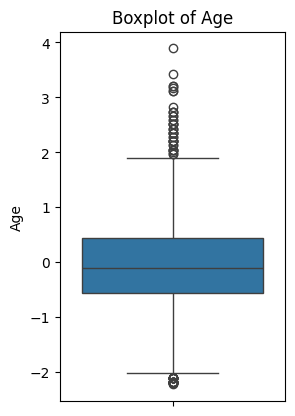

In [13]:
# Boxplot for 'Age'
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

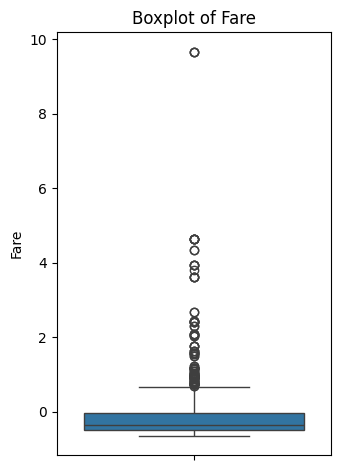

In [14]:
# Boxplot for 'Fare'
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')
plt.tight_layout()
plt.show()

In [15]:
# Calculate IQR for 'Age' and 'Fare'
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

In [16]:
# Define outlier bounds
age_lower_bound = Q1_age - 1.5 * IQR_age
age_upper_bound = Q3_age + 1.5 * IQR_age

fare_lower_bound = Q1_fare - 1.5 * IQR_fare
fare_upper_bound = Q3_fare + 1.5 * IQR_fare

In [17]:
# Remove outliers
df_no_outliers = df[
    (df['Age'] >= age_lower_bound) & (df['Age'] <= age_upper_bound) &
    (df['Fare'] >= fare_lower_bound) & (df['Fare'] <= fare_upper_bound)
]

print(f"Original dataframe shape: {df.shape}")
print(f"Dataframe shape after removing outliers: {df_no_outliers.shape}")

Original dataframe shape: (891, 9)
Dataframe shape after removing outliers: (721, 9)


In [18]:
# Visualize the data again after removing outliers
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Boxplot of Age (No Outliers)')

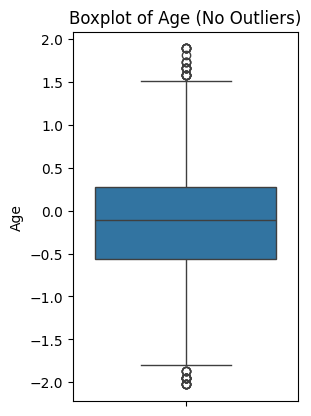

In [19]:
# Boxplot for 'Age'
plt.subplot(1, 2, 1)
sns.boxplot(y=df_no_outliers['Age'])
plt.title('Boxplot of Age (No Outliers)')

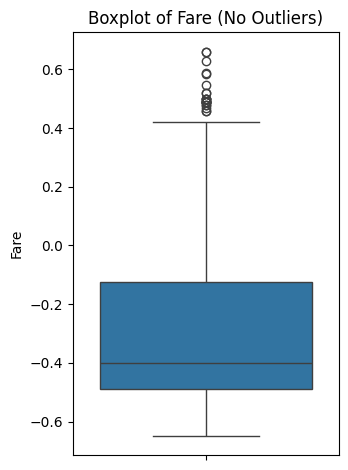

In [20]:
# Boxplot for 'Fare'
plt.subplot(1, 2, 2)
sns.boxplot(y=df_no_outliers['Fare'])
plt.title('Boxplot of Fare (No Outliers)')
plt.tight_layout()
plt.show()